Let's Analyze the the Neflix Data.

Data has been taken from the Kaggle

Link : https://www.kaggle.com/aalhendi/netflix-movies-and-tv-shows-ratings?select=netflix_titles.csv

Let's see more insights about the data and plot the graphs

In [1]:
#Import all the necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticke

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
# Number of columns and rows
df.shape

(6234, 12)

In [4]:
#All the columns with their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


In [34]:
#Since We Don't have useful integer/float data it is of no use currently
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [6]:
#Let's look at the unique values in "types" column
print(df["type"].unique())

['Movie' 'TV Show']


In [7]:
"How many movies and shows yearly ??  Let's find out !!"
yearly_movies = df.loc[(df["release_year"] <= 2018)].groupby(['release_year']).type.count()
yearly_movies.head()

release_year
1925    1
1942    2
1943    3
1944    3
1945    3
Name: type, dtype: int64

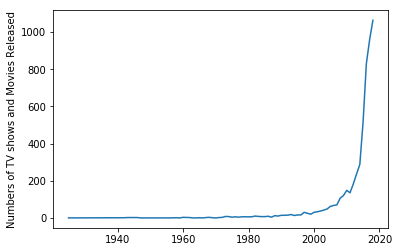

In [8]:
#Let's plot graph taking Y axis as the count and  X as Year
plt.plot(yearly_movies)
plt.ylabel('Numbers of TV shows and Movies Released')
plt.show()

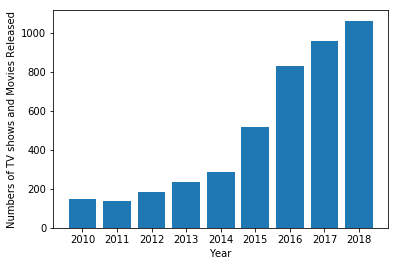

In [17]:
#Let's draw bar charts too for better understanding
values_between = (df["release_year"] >= 2010) & (df["release_year"] <= 2018)
y = df.loc[values_between].groupby(['release_year']).type.count()
plt.bar(y.index,y)
plt.xticks(y.index)
plt.xlabel("Year")
plt.ylabel('Numbers of TV shows and Movies Released')
plt.show()

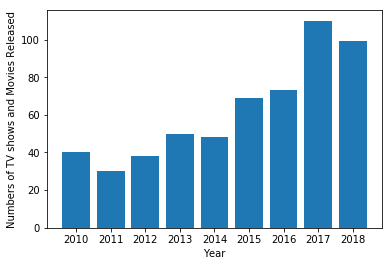

In [22]:
year_wise_shoots_in_india = df.loc[((df['country'].str.contains("India")) == True) & (values_between)].groupby(['release_year']).type.count()
y = year_wise_shoots_in_india
plt.bar(y.index,y)
plt.xticks(y.index)
plt.xlabel("Year")
plt.ylabel('Numbers of TV shows and Movies Released')
plt.show()


In [23]:
df["listed_in"].unique()

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies',
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Docuseries, Science & Nature TV', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Children & Family Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Documentaries', 'Horror Movies, Thrillers',
       'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Docuseries', 'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, 

In [26]:
# Year-Wise Distribution of Comedy Movies Across the World
y = df.loc[((df['listed_in'].str.contains("Come")) == True) & (values_between)].groupby(['release_year']).type.count()
y

release_year
2010     42
2011     50
2012     72
2013     70
2014     83
2015    138
2016    213
2017    269
2018    296
Name: type, dtype: int64

In [33]:
#Let's see Top Five director who has directed maximum number of movies from our given dataset
df["director"].value_counts().head()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
Name: director, dtype: int64